**Example 1.2 - Sun Position**
> some lines were commented out since it will be used in further cells

In [1]:
import numpy as np

#Initial Parameters
DayOfYear=309 #Nov 5th in the year 2015
TimeZone=+2 #Difference to Greenwich Mean Time GMT
SummerTime=0 #1=TRUE, 0=FALSE
Longitude=8.213889  #Oldenburg (in degrees)
Latitude=53.143889 #Oldenburg (in degrees)
EarthTilt=23.45 #degrees

#Translate degree values into radians
Long_rad=np.deg2rad(Longitude)  
Lat_rad=np.deg2rad(Latitude) 
Tilt_rad=np.deg2rad(EarthTilt) 

# LT=15.5 #afternoon would correspond to 3:30 pm
LSTM=15*(TimeZone+SummerTime)
B=(360/365)*(DayOfYear-81) #Postition on the orbit (angle)
EoT = 9.87*np.sin(np.deg2rad(2*B))-7.53*np.cos(np.deg2rad(B))-1.5*np.sin(np.deg2rad(B)) #minutes
TC=4*(Longitude-LSTM)+EoT #in minutes
# LST=LT+TC/60 - removed here to be defined in next cell
# HRA=15*(LST-12) #Hour angle, 0 at noon - removed here to be defined in next cell

# Declination_rad = np.arcsin(np.sin(Tilt_rad)*np.sin(np.deg2rad(B)))
# Elevation = np.rad2deg(np.arcsin( np.sin(Declination_rad)*np.sin(Lat_rad)+np.cos(Declination_rad)*np.cos(Lat_rad) *np.cos(np.deg2rad(HRA)) ))

# Azimuth = np.rad2deg(np.arccos( ( np.sin(Declination_rad)*np.cos(Lat_rad)-np.cos(Declination_rad)*np.sin(Lat_rad) *np.cos(np.deg2rad(HRA)) )/np.cos(np.deg2rad(Elevation)) ))

**Example 2.1 - Sun position over day**
> the code commented out from previous example is placed inside the `for` loop to store values for different values of Time (LT)

In [1]:
ts = 1/20                          #timstep in hour (1/20 hrs = 0.05 hrs = 3 mins)
hpd = 24                           # number of hours per day
N = int(hpd/ts)                    # number of timsteps per day 
LT = 0                             # initial value of LT, time starts at 0 hours 0 minutes (00:00)
Result = np.zeros(shape=(N,3))     # Result: matrix of N rows and 3 columns, for storing LT, Elevation and Azimuth values each loop
HRA = np.zeros(shape=(N,1))        
LST = np.zeros(shape=(N,1))

# a loop to calculate the Azimuth and Elevation at each time step
for i in range(N):                 # counter for timsteps from 1 to N, timstep, 1 for 1st timstep, 2 for 2nd timestep and so on
# a condition to insure that the calculations at LT=0 are taken into consideration    
    if i == 0:
        LT = 0
    else:
        LT = LT + ts                   # increment LT by ts
    
    LST[i]=LT+TC/60       
    HRA[i]=15*(LST[i] -12)         
    Declination_rad= np.arcsin(np.sin(Tilt_rad)*np.sin(np.deg2rad(B)))
    Elevation = np.rad2deg(np.arcsin(np.sin(Declination_rad)*np.sin(Lat_rad)+np.cos(Declination_rad)*np.cos(Lat_rad)*np.cos(np.deg2rad(HRA[i]))))
    Azimuth = np.rad2deg(np.arccos((np.sin(Declination_rad)*np.cos(Lat_rad)-np.cos(Declination_rad)*np.sin(Lat_rad) *np.cos(np.deg2rad(HRA[i])))/np.cos(np.deg2rad(Elevation))))
    Result[i,0] = LT   # store LT value
    Result[i,1] = Azimuth
    Result[i,2] = Elevation

NameError: name 'np' is not defined

**Example 2.2 - Sun position over day with plot**

In [10]:
Time = Result[:,0]
Azimuth = Result[:,1]
Elevation = Result[:,2]

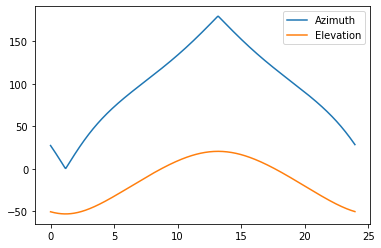

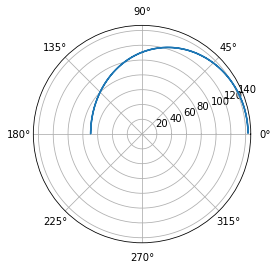

In [12]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots() 
ax.plot(Time, Azimuth, label="Azimuth")
ax.plot(Time, Elevation, label="Elevation") 
ax.legend() 
plt.show()

ax2 = plt.subplot(projection="polar") 
ax2.plot(np.deg2rad(Azimuth),(90-Elevation))

**Example 2.3 - Sun position over day with plot - Correction**

In [13]:
# Correcting the plot by going through the array element-wise and adjusting the values based on certain conditions 
for j in range(len(Time)): 
    #print(j) 
    if ((HRA[j] < 0) or (LST[j] < 12)):
        Azimuth[j]=Azimuth[j] 
    else: 
        Azimuth[j]=360-Azimuth[j]
    if ((HRA[j] < 0) and (LST[j] < 0)):
        Azimuth[j]=-Azimuth[j]

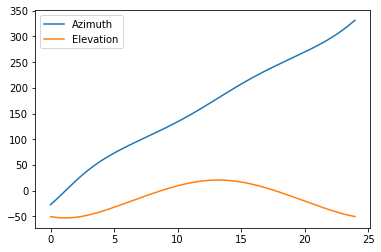

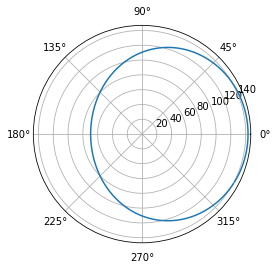

In [14]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots() 
ax.plot(Time, Azimuth, label="Azimuth")
ax.plot(Time, Elevation, label="Elevation") 
ax.legend() 
plt.show()

ax2 = plt.subplot(projection="polar") 
ax2.plot(np.deg2rad(Azimuth),(90-Elevation))